In [92]:
import time
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
import sklearn.metrics as sm

In [93]:
column = ["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age","Outcome"]
df = pd.read_csv('pima-diabetes.csv',names=column)
dfx = pd.read_csv('pima-diabetes.csv',names=column)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [94]:
df.Glucose.var()

1022.2483142519557

In [95]:
start_time = time.time()

scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(df.iloc[:,0:2])
dfx[['Pregnancies','Glucose']] = scaler.transform(df.iloc[:,0:2])

end_time = time.time()
print("Durasi %g detik" % (end_time - start_time))



Durasi 0.00908804 detik


In [96]:
dfx.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,72,35,0,33.6,0.627,50,1
1,0.058824,0.427136,66,29,0,26.6,0.351,31,0
2,0.470588,0.919598,64,0,0,23.3,0.672,32,1
3,0.058824,0.447236,66,23,94,28.1,0.167,21,0
4,0.000000,0.688442,40,35,168,43.1,2.288,33,1


In [97]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [98]:
df.Glucose.std()

31.97261819513622

In [99]:
def minmax(X, array):
    X_scaled = (X-min(array))/(max(array)-min(array))
    return X_scaled

In [100]:
def minmax_ranged(X, array, value):
    #X_scaled = (X-min(array))/(max(array)-min(array))
    X_scaled = value[0] + (((X-min(array)*(value[0]-value[1])))/(max(array)-min(array)))
    return X_scaled

In [101]:
minmax(148,df.Glucose.values), minmax_ranged(148,df.Glucose.values,[0,1])

(0.7437185929648241, 0.7437185929648241)

In [102]:
def robustscaler(X, df):
    X_scaled = (X - df.quantile(0.25))/(df.quantile(0.75) - df.quantile(0.25))
    return X_scaled

In [103]:
robustscaler(148, df.Glucose)

1.187878787878788

In [104]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1:].values.ravel()
X_ = dfx.iloc[:,:-1].values
y_ = dfx.iloc[:,-1:].values.ravel()

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=None)
X_train_, X_test_, y_train_, y_test_ = train_test_split(X_,y_,test_size=0.2, random_state=None)

In [106]:
clf = GaussianNB() 
clf.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [107]:
clf_ = GaussianNB() 
clf.fit(X_train_, y_train_)

GaussianNB(priors=None, var_smoothing=1e-09)

In [108]:
scoring = ['accuracy','precision','recall']
scores = cross_validate(clf, X_test, y_test, scoring=scoring, cv=5, return_train_score=True)
scores_ = cross_validate(clf_, X_test_, y_test_, scoring=scoring, cv=5, return_train_score=True)

In [109]:
scores_

{'fit_time': array([0.00087023, 0.00060868, 0.00057507, 0.00059915, 0.00065613]),
 'score_time': array([0.00601482, 0.0020659 , 0.00196838, 0.0031848 , 0.00218344]),
 'test_accuracy': array([0.93548387, 0.61290323, 0.77419355, 0.83870968, 0.73333333]),
 'train_accuracy': array([0.7804878 , 0.8699187 , 0.79674797, 0.78861789, 0.81451613]),
 'test_precision': array([0.83333333, 0.375     , 0.66666667, 0.69230769, 0.57142857]),
 'train_precision': array([0.65789474, 0.76744186, 0.675     , 0.66666667, 0.70731707]),
 'test_recall': array([1.        , 0.3       , 0.6       , 0.9       , 0.44444444]),
 'train_recall': array([0.64102564, 0.84615385, 0.69230769, 0.66666667, 0.725     ])}

In [110]:
scores

{'fit_time': array([0.00151587, 0.00122404, 0.00105309, 0.00162125, 0.00062919]),
 'score_time': array([0.00540972, 0.00401878, 0.00381327, 0.00605202, 0.00220609]),
 'test_accuracy': array([0.74193548, 0.67741935, 0.74193548, 0.90322581, 0.86666667]),
 'train_accuracy': array([0.79674797, 0.85365854, 0.82926829, 0.80487805, 0.77419355]),
 'test_precision': array([0.63636364, 0.54545455, 0.71428571, 0.9       , 0.81818182]),
 'train_precision': array([0.73170732, 0.80952381, 0.76744186, 0.73809524, 0.7       ]),
 'test_recall': array([0.63636364, 0.54545455, 0.45454545, 0.81818182, 0.81818182]),
 'train_recall': array([0.68181818, 0.77272727, 0.75      , 0.70454545, 0.63636364])}

In [111]:
#Hasil cross validation berupa dictionary. Kemudian dictionary disimpan menjadi dataframe. Hanya untuk keperluan pembacaan
df_scores = pd.DataFrame.from_dict(scores)
df_scores_ = pd.DataFrame.from_dict(scores_)

In [112]:
df_scores

,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall
0,0.001516,0.005410,0.741935,0.796748,0.636364,0.731707,0.636364,0.681818
1,0.001224,0.004019,0.677419,0.853659,0.545455,0.809524,0.545455,0.772727
2,0.001053,0.003813,0.741935,0.829268,0.714286,0.767442,0.454545,0.750000
3,0.001621,0.006052,0.903226,0.804878,0.900000,0.738095,0.818182,0.704545
4,0.000629,0.002206,0.866667,0.774194,0.818182,0.700000,0.818182,0.636364


In [113]:
df_scores_

,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall
0,0.000870,0.006015,0.935484,0.780488,0.833333,0.657895,1.000000,0.641026
1,0.000609,0.002066,0.612903,0.869919,0.375000,0.767442,0.300000,0.846154
2,0.000575,0.001968,0.774194,0.796748,0.666667,0.675000,0.600000,0.692308
3,0.000599,0.003185,0.838710,0.788618,0.692308,0.666667,0.900000,0.666667
4,0.000656,0.002183,0.733333,0.814516,0.571429,0.707317,0.444444,0.725000


In [114]:
df_scores['fit_time'].mean()

0.0012086868286132813

In [115]:
df_scores_['fit_time'].mean()

0.0006618499755859375

In [116]:
df_scores['test_accuracy'].mean()

0.786236559139785

In [117]:
df_scores_['test_accuracy'].mean()

0.7789247311827957

In [118]:
df_scores['test_precision'].mean()

0.7228571428571429

In [119]:
df_scores_['test_precision'].mean()

0.6277472527472527

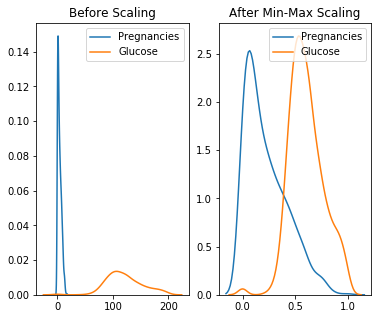

In [120]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))
ax1.set_title('Before Scaling')
sns.kdeplot(df['Pregnancies'], ax=ax1)
sns.kdeplot(df['Glucose'], ax=ax1)
ax2.set_title('After Min-Max Scaling')
sns.kdeplot(dfx['Pregnancies'], ax=ax2)
sns.kdeplot(dfx['Glucose'], ax=ax2)
plt.show()